<a href="https://colab.research.google.com/github/seungpyo/KOSPI_FFT/blob/main/KOSPI_FFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U finance-datareader

(943,)


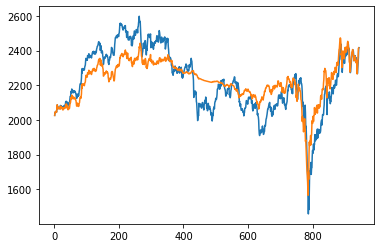

In [135]:
import numpy as np
import FinanceDataReader as fdr
import matplotlib.pyplot as plt

df = fdr.DataReader('KS11', '2017')
price = df['Close']

N = len(price)
freq_z = np.minimum(np.fft.fft(price) / N, 250)
freq = [abs(z) for z in freq_z]

clean_freq = np.fft.fft(price)[:-1]
print(clean_freq.shape)
clean_price_z = np.fft.ifft(clean_freq)
clean_price = [z.real for z in clean_price_z]
plt.plot(np.linspace(1, len(price), len(price)), price)
plt.plot(np.linspace(1, len(clean_price), len(clean_price)), clean_price)


In [104]:
import torch
from torch import nn
import torch.nn.functional as F

class LINSIN(nn.Module):
  def __init__(self):
    super(LINSIN, self).__init__()
    self.a = nn.Parameter(torch.randn(1))
    self.b = nn.Parameter(torch.randn(1))
    self.c = nn.Parameter(torch.randn(1))
    self.d = nn.Parameter(torch.randn(1))
  def forward(self, x):
    y = self.b * torch.sin(self.c * x)#  + self.d
    return y

linsin = LINSIN()
# optimizer = torch.optim.SGD(linsin.parameters(), lr=1e-5, momentum=0.2, weight_decay=1e-2)
optimizer = torch.optim.Adam(linsin.parameters(), lr=1e-1, weight_decay=0)
linsin.train()
earlyStop = False
for epoch in range(128):
  loss_sum = 0.0
  for i, p in enumerate(price):
    i, p = torch.Tensor([i]), torch.Tensor([p])
    y = linsin(i)
    loss = F.l1_loss(y, p)
    loss_sum += loss
    loss.backward()
    optimizer.step()
  print('epoch {0}: loss = {1}'.format(epoch, loss_sum / len(price)))
  print(linsin.a[0], linsin.b[0], linsin.c[0]) #, float(linsin.d[0]))
  
print(loss)
print(linsin.a, linsin.b, linsin.c, linsin.d)

epoch 0: loss = 2224.34375
tensor(-0.2876, grad_fn=<SelectBackward>) tensor(-20.3816, grad_fn=<SelectBackward>) tensor(-168.8896, grad_fn=<SelectBackward>)
epoch 1: loss = 2225.2060546875
tensor(-0.2876, grad_fn=<SelectBackward>) tensor(-101.0736, grad_fn=<SelectBackward>) tensor(-208.6885, grad_fn=<SelectBackward>)
epoch 2: loss = 2225.61572265625
tensor(-0.2876, grad_fn=<SelectBackward>) tensor(-171.0552, grad_fn=<SelectBackward>) tensor(-35.8176, grad_fn=<SelectBackward>)
epoch 3: loss = 2227.89404296875
tensor(-0.2876, grad_fn=<SelectBackward>) tensor(-94.6541, grad_fn=<SelectBackward>) tensor(2.6976, grad_fn=<SelectBackward>)
epoch 4: loss = 2224.077392578125
tensor(-0.2876, grad_fn=<SelectBackward>) tensor(46.9305, grad_fn=<SelectBackward>) tensor(4.1095, grad_fn=<SelectBackward>)
epoch 5: loss = 2226.432373046875
tensor(-0.2876, grad_fn=<SelectBackward>) tensor(113.9277, grad_fn=<SelectBackward>) tensor(16.4443, grad_fn=<SelectBackward>)
epoch 6: loss = 2228.1826171875
tensor(-0

KeyboardInterrupt: ignored